## [All About Vis] How to Make the Right Lineplot?

Visualization is a beautiful and insightful discipline and field.

Sometimes information is important, and sometimes the aesthetic is important.

However, I wrote this notebook because it would be nice to think about the more informational aspect from the standpoint of data analysis.

### Related Notebook

- [[All About Vis] How to Make the Right Barplot?](https://www.kaggle.com/subinium/all-about-vis-how-to-make-the-right-barplot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import Dataset & Preprocessing

In [2]:
house_price = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
stock = pd.read_csv('../input/nyse/prices.csv')

In [3]:
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')

In [4]:
# FAANG
facebook = stock[stock['symbol']=='FB']
apple = stock[stock['symbol']=='AAPL']
amazon = stock[stock['symbol']=='AMZN']
netflix = stock[stock['symbol']=='NFLX']
google = stock[stock['symbol']=='GOOGL']
google.head()

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
1844,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2312,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


## Basic Lineplot

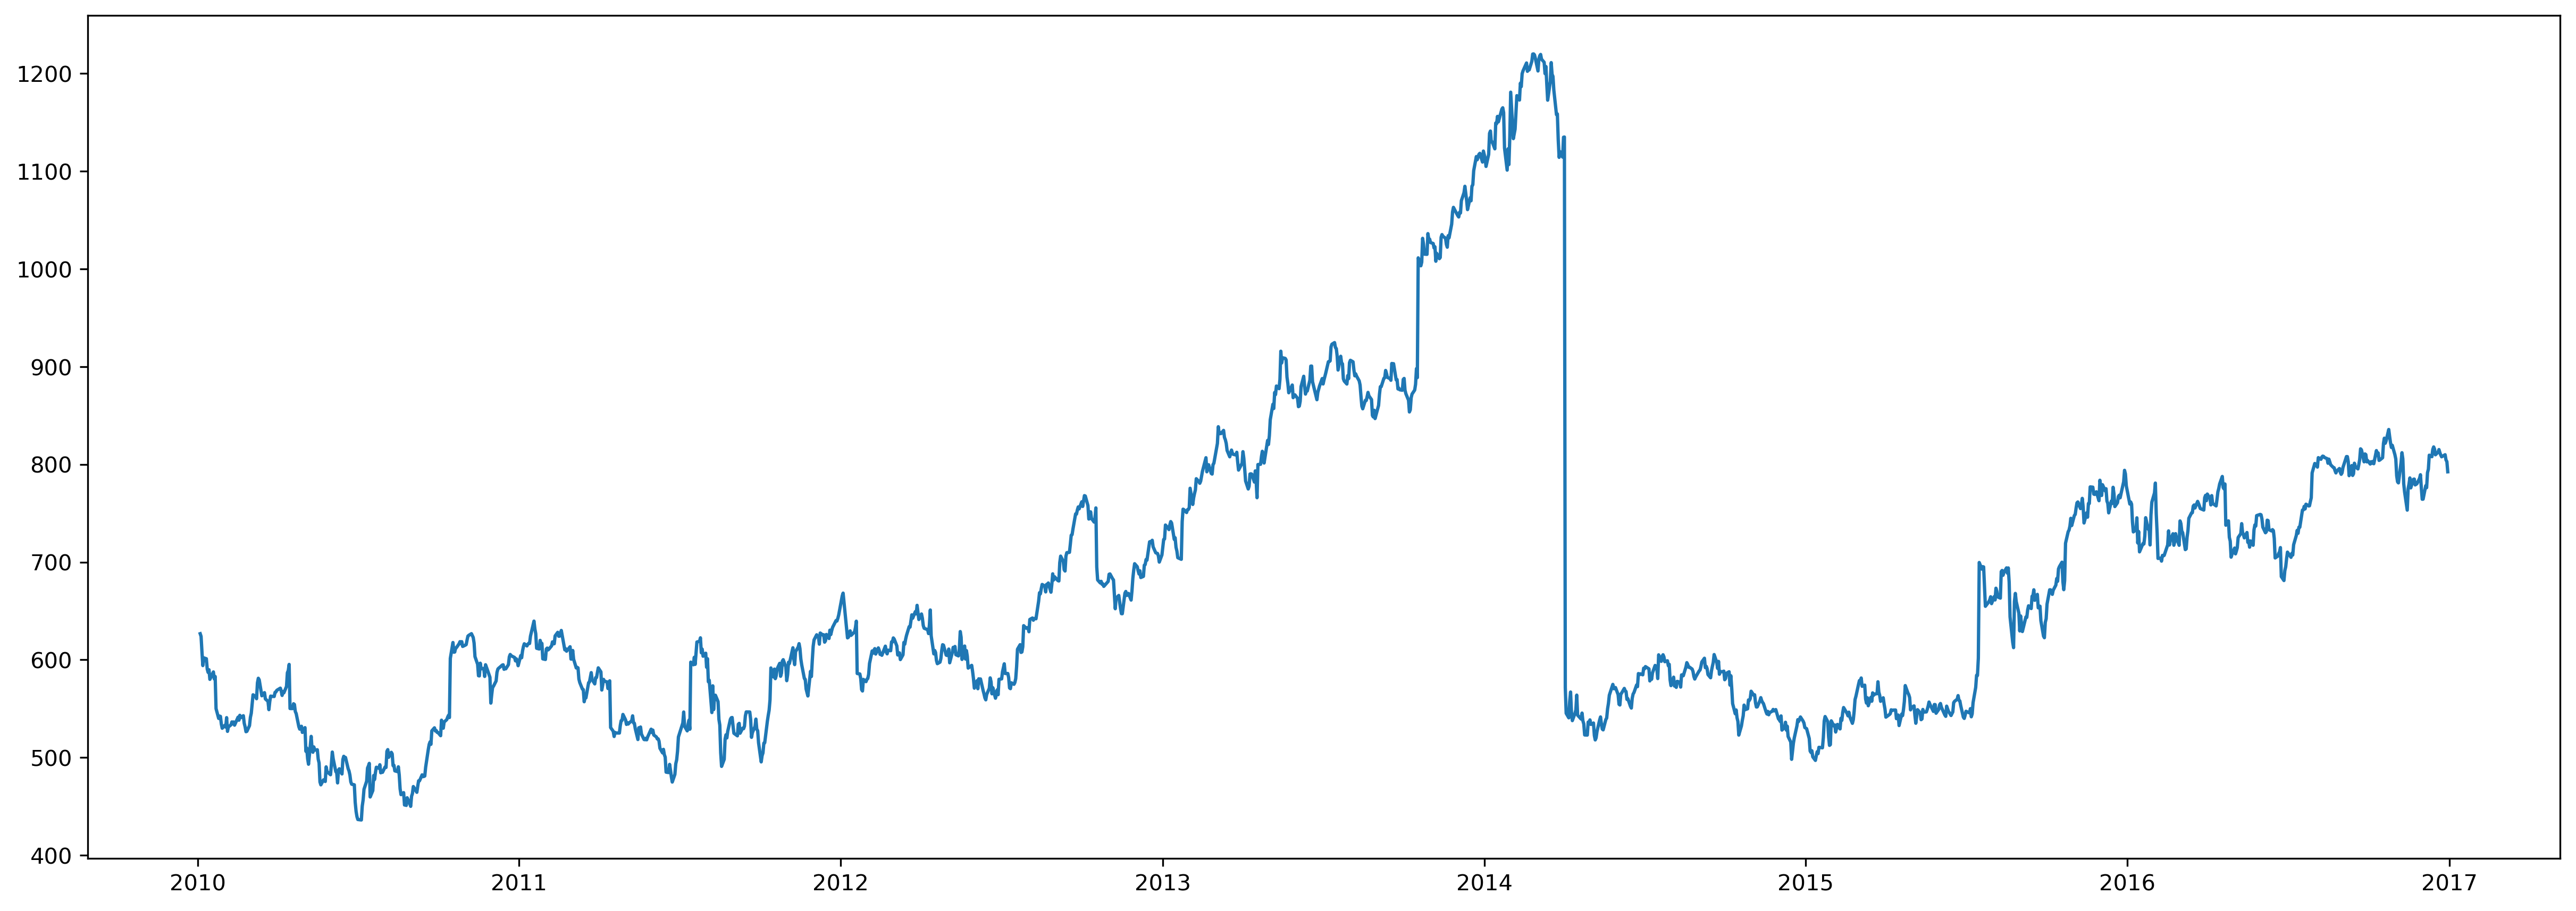

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7), dpi=300)

google_color='#636EFA'
ax.plot(google['date'],google['close'])

plt.show()

There are three main ways to change the line plot.

1. Color
2. Line Type
3. Marker

### Color

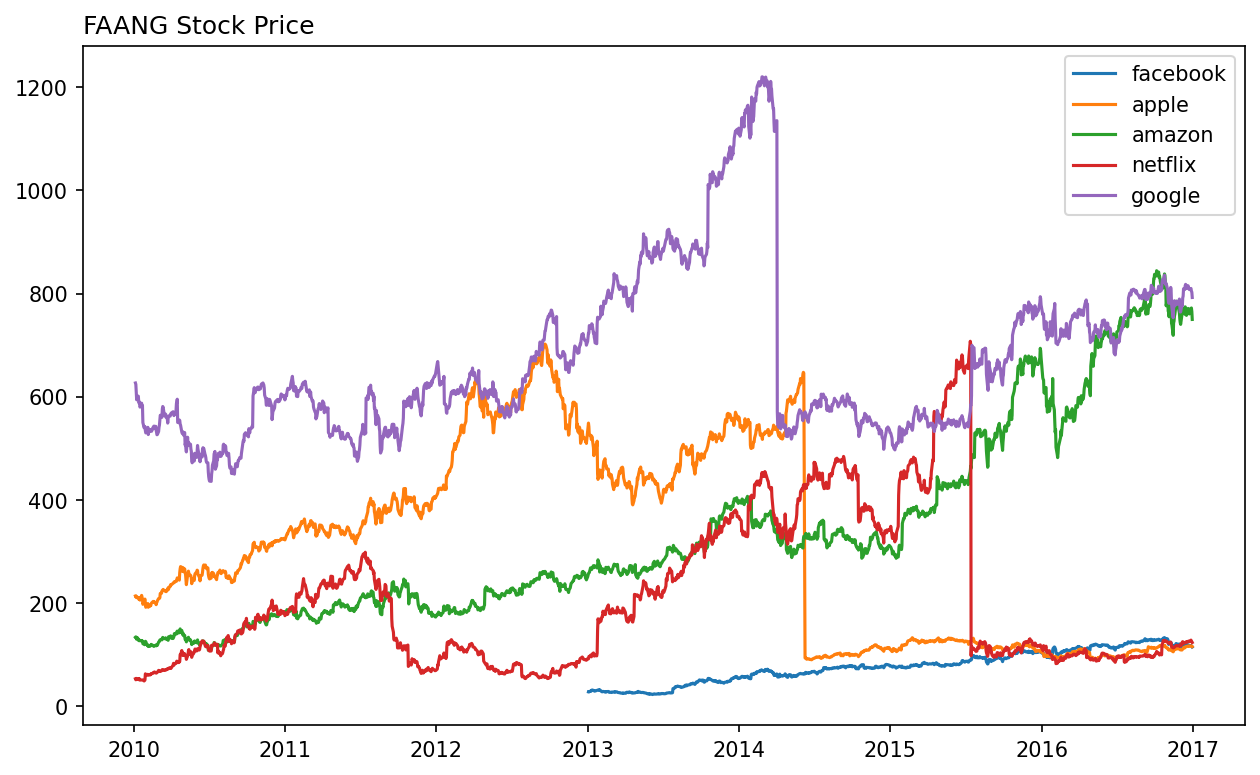

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=150)


ax.plot(facebook['date'],facebook['close'],label='facebook')
ax.plot(apple['date'],apple['close'],label='apple')
ax.plot(amazon['date'],amazon['close'],label='amazon')
ax.plot(netflix['date'],netflix['close'],label='netflix')
ax.plot(google['date'],google['close'],label='google')


ax.set_title('FAANG Stock Price', loc='left', fontsize=12)
ax.legend()
plt.show()

### Line Type

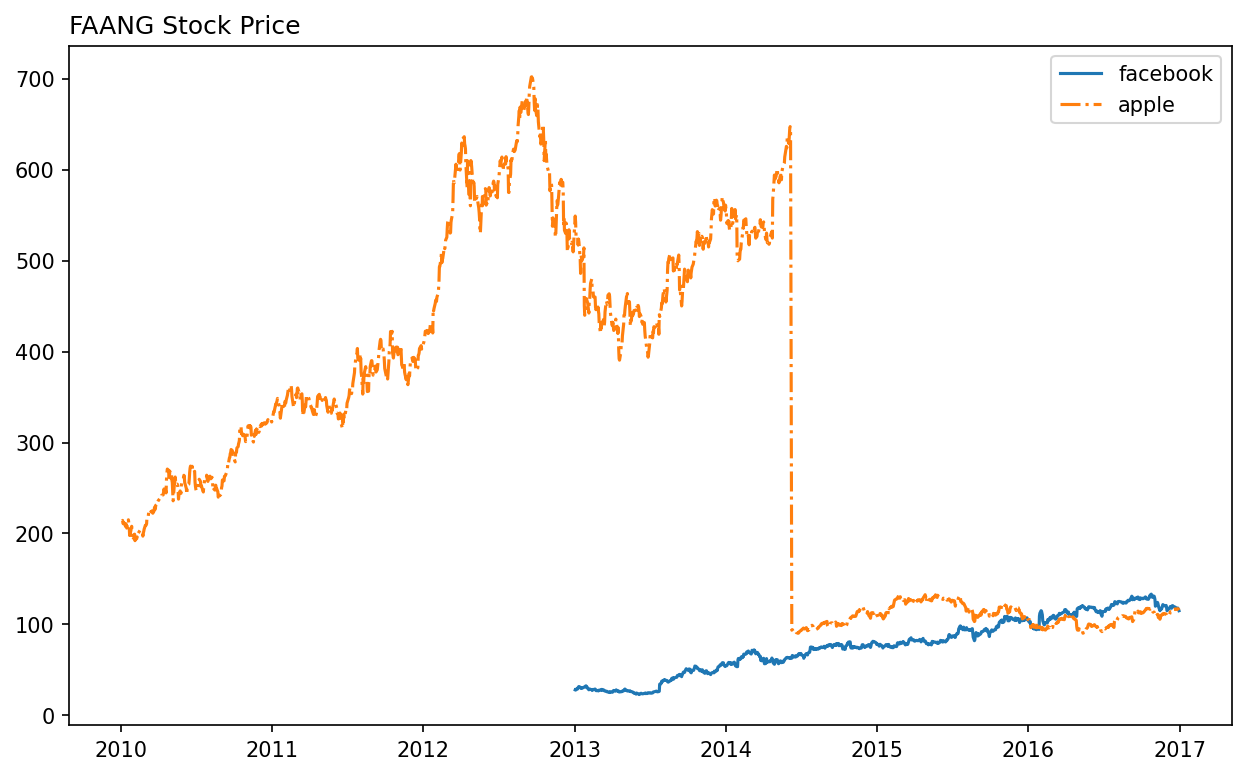

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=150)


ax.plot(facebook['date'],facebook['close'],label='facebook')
ax.plot(apple['date'],apple['close'],label='apple', linestyle='-.')


ax.set_title('FAANG Stock Price', loc='left', fontsize=12)
ax.legend()
plt.show()

### Marker



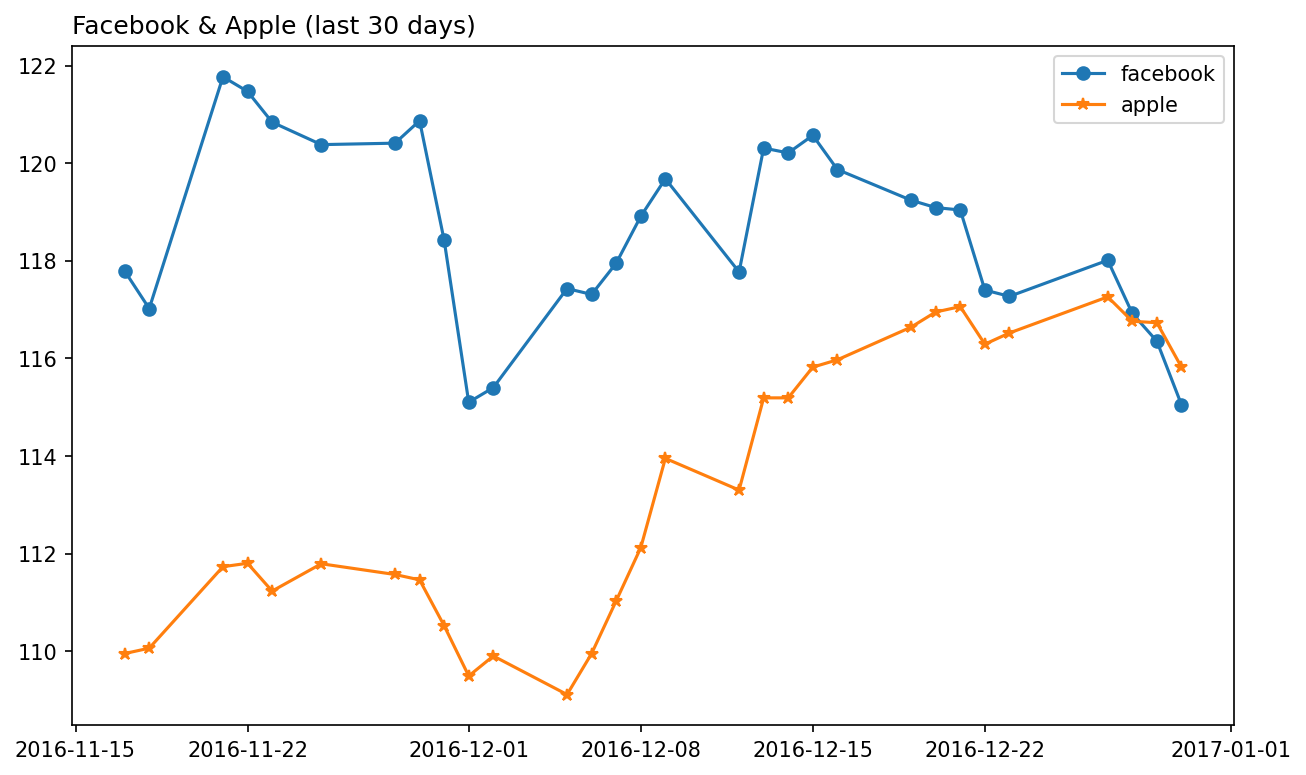

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=150)


ax.plot(facebook['date'].iloc[-30:],facebook['close'].iloc[-30:],label='facebook', marker='o')
ax.plot(apple['date'].iloc[-30:],apple['close'].iloc[-30:],label='apple', marker='*')


ax.set_title('Facebook & Apple (last 30 days)', loc='left', fontsize=12)

ax.legend()
plt.show()

## Smoothing

Data can be spaced so tightly that it is difficult to spot periodicities or patterns.

In this case, you can use smoothing to see the overall flow.

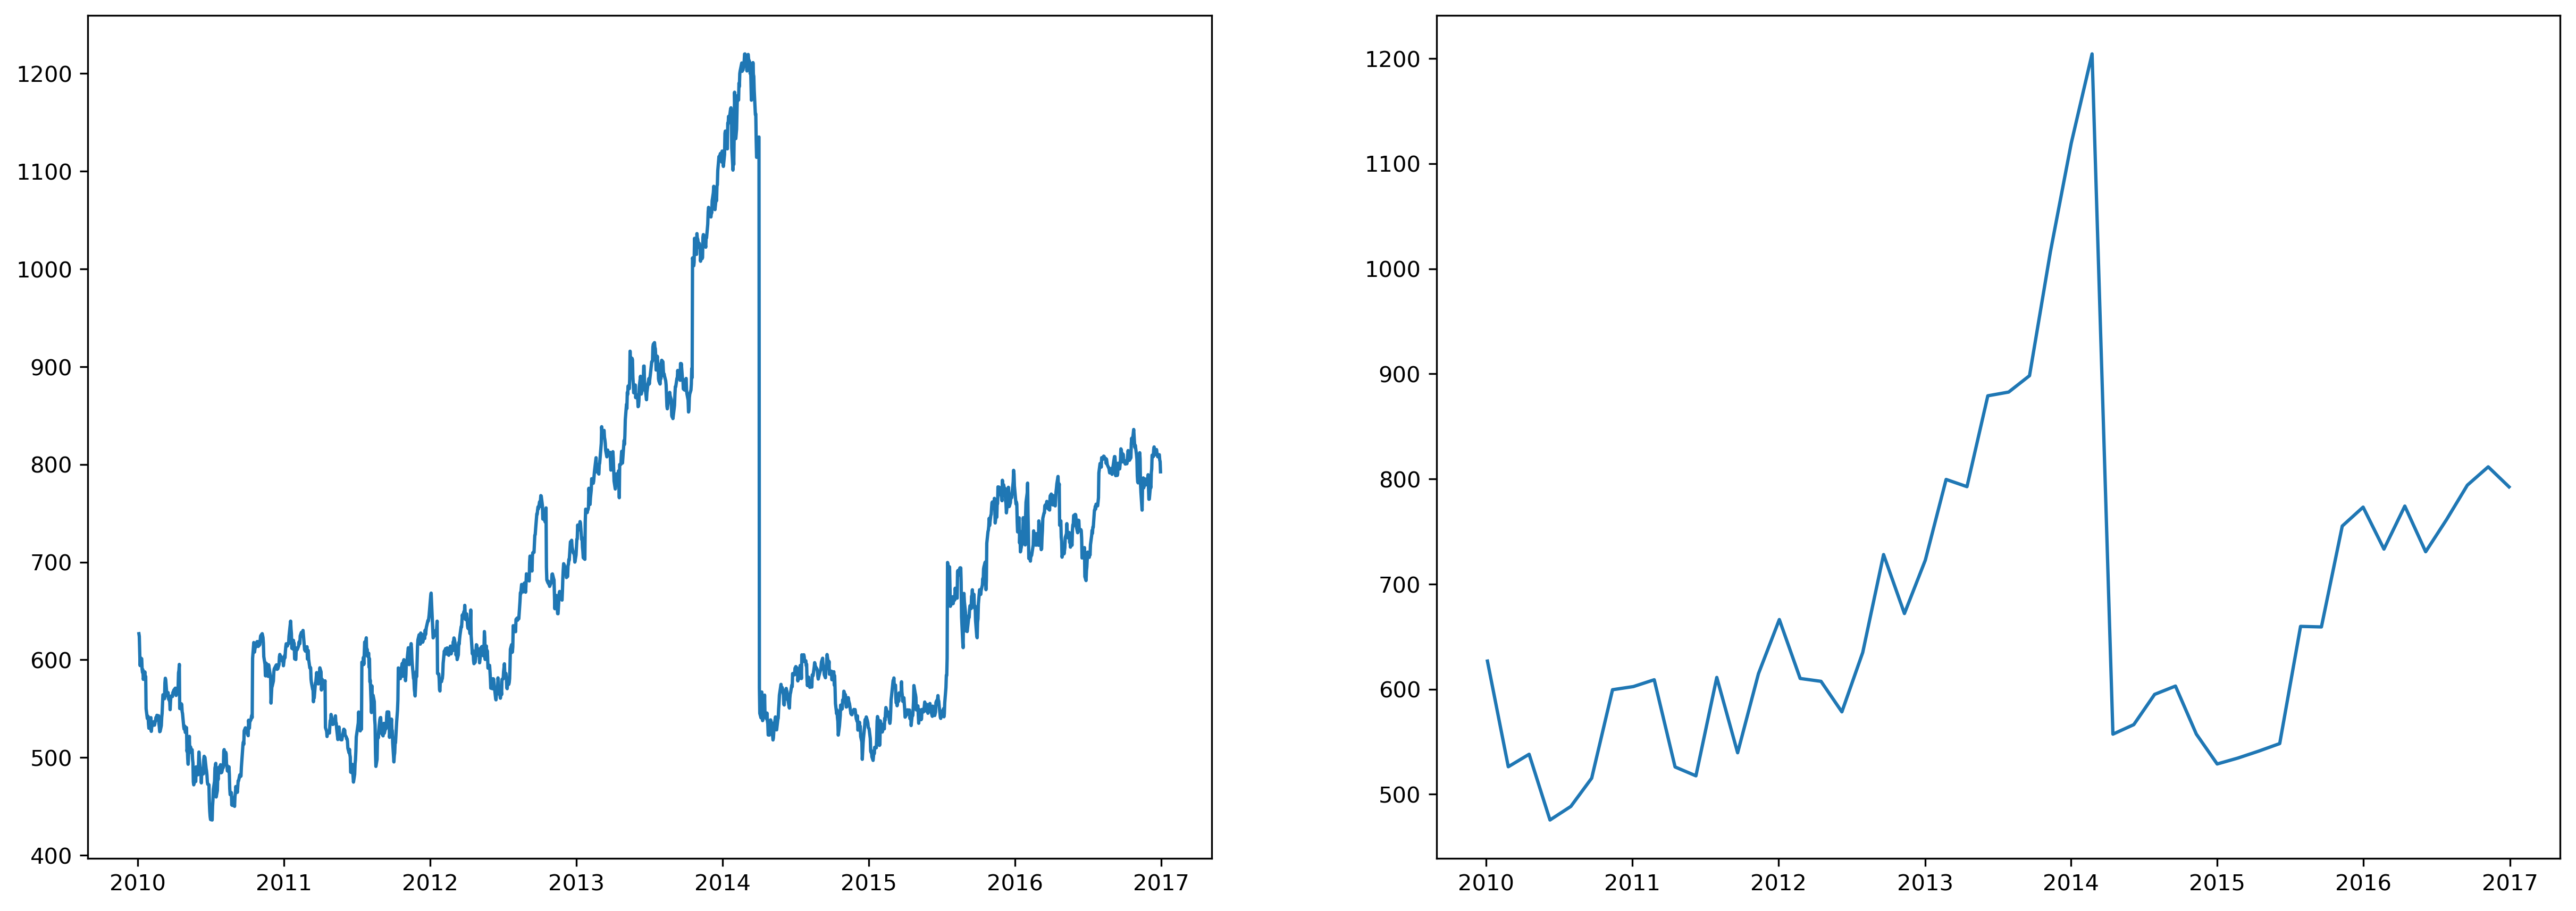

In [9]:
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google['date']
value_np = google['close']

date_num = dates.date2num(date_np)
# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)
# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

## Simple Chart is Better

When it comes to EDA, it's important to see specific information, so Grid can be helpful, but Lineplot is usually a graphical representation to see trends, so simple things are often better.

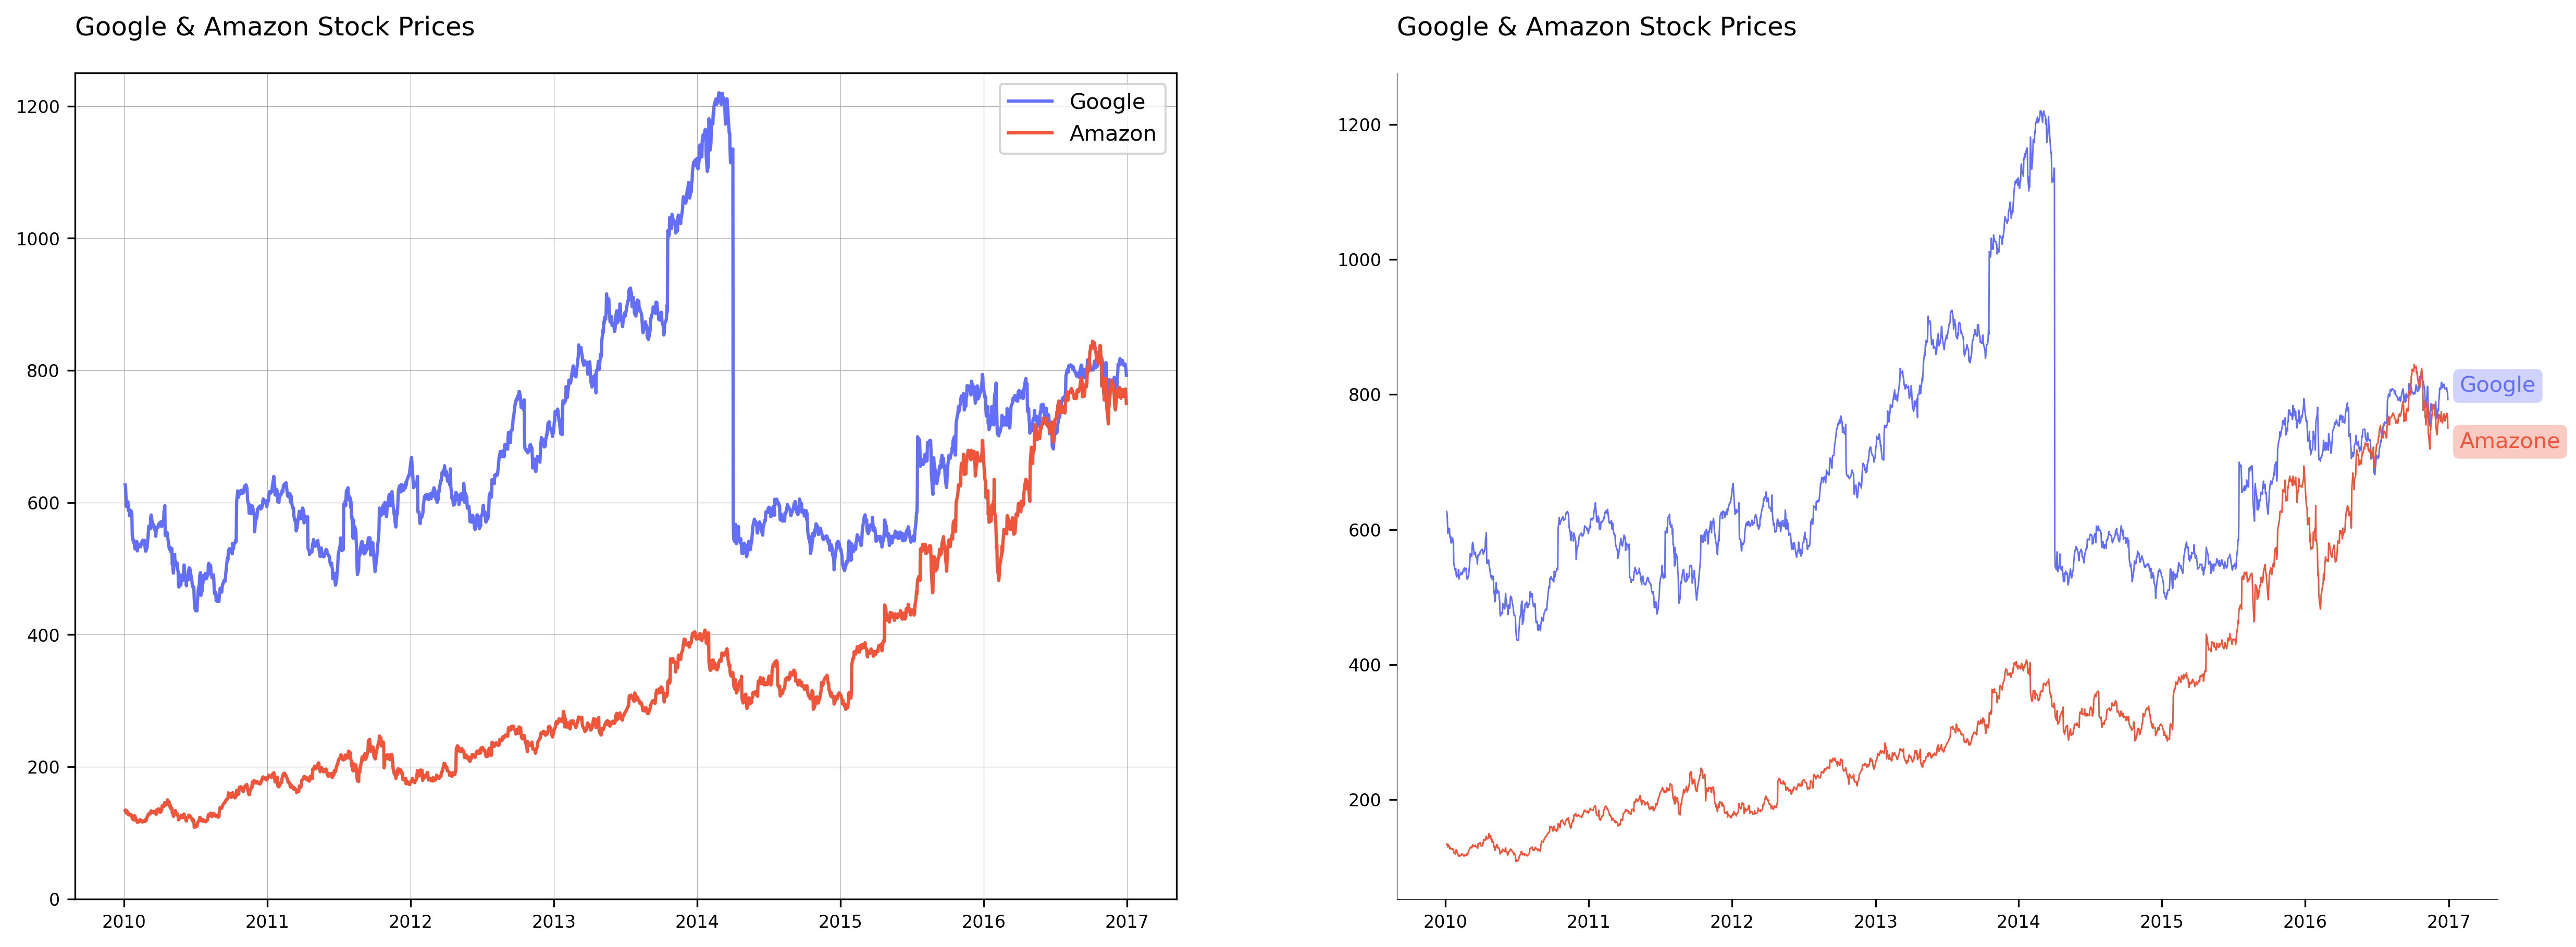

In [10]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

google_color='#636EFA'
amazon_color='#EF553B'

# Ax[0]


ax[0].plot(google['date'],google['close'],
        color=google_color, label='Google')

ax[0].plot(amazon['date'], amazon['close'],
        color=amazon_color, label='Amazon'
       )

ax[0].set_ylim(0, 1250)


ax[0].tick_params(axis='both', which='major', labelsize=8)
ax[0].set_title('Google & Amazon Stock Prices', loc='left', y=1.03, fontweight='medium')


ax[0].legend()
ax[0].grid(linewidth=0.3)



# Ax[1]

ax[1].plot(google['date'],google['close'],
        linewidth=0.7,
        color=google_color)

ax[1].plot(amazon['date'], amazon['close'],
        linewidth=0.7,
        color=amazon_color
       )



ax[1].text(x=google['date'].iloc[-1]+ pd.DateOffset(30), y=google['close'].iloc[-1]+20, s='Google', 
        va='center', ha='left', 
        bbox=dict(boxstyle='round,pad=0.3', fc=google_color, ec='none', alpha=0.3), 
        color=google_color)

ax[1].text(x=amazon['date'].iloc[-1]+ pd.DateOffset(30), y=amazon['close'].iloc[-1]-20, s='Amazone', 
        va='center', ha='left', 
        bbox=dict(boxstyle='round,pad=0.3', fc=amazon_color, ec='none', alpha=0.3), 
        color=amazon_color)


ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


ax[1].spines['bottom'].set_linewidth(0.3)
ax[1].spines['left'].set_linewidth(0.3)

ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].set_title('Google & Amazon Stock Prices', loc='left', y=1.03, fontweight='medium')

plt.show()

## Interval

Misunderstanding may occur depending on the X-axis section.

1. When the X-axis section is not regular but expressed regularly -> There is a possibility that the slope information could be misinterpreted
2. If the X-axis section is not regular and reflects it -> You may be mistaken for missing data points

The x-axis interval reflects the data as much as possible, and it is recommended to mark the point with data through a marker.

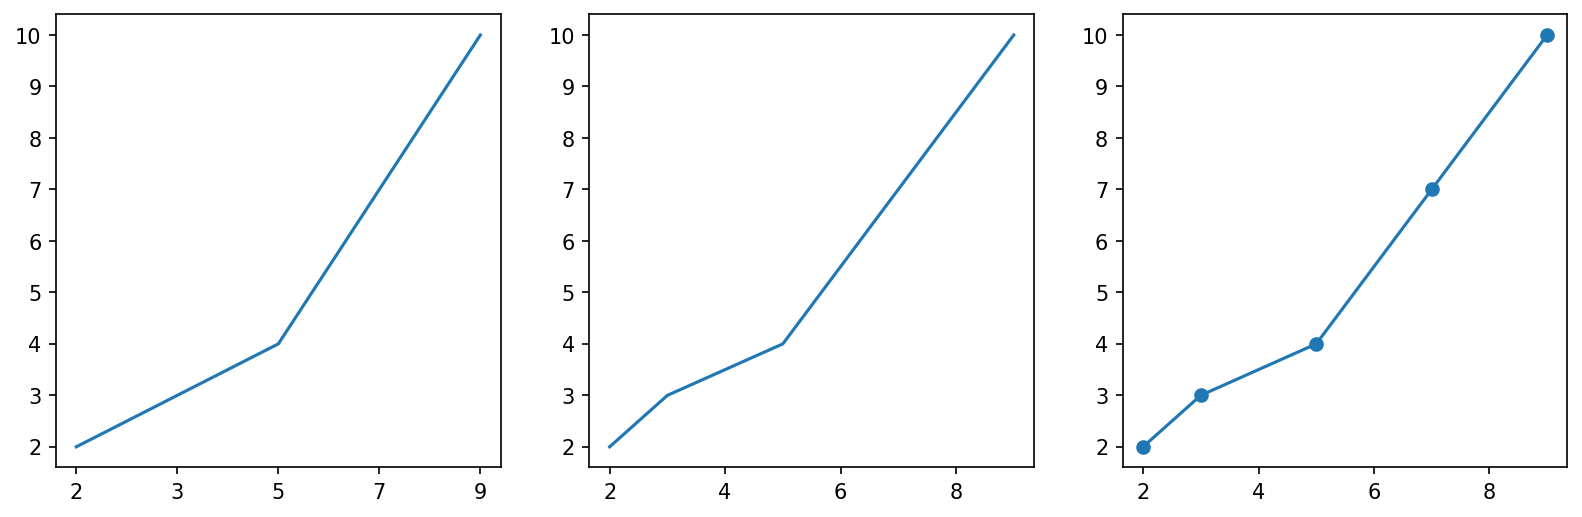

In [11]:
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, ax = plt.subplots(1, 3, figsize=(13, 4), dpi=150)
ax[0].plot([str(i) for i in x], y)
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')

plt.show()

## Dual Axis

You can plot 2 pieces of information with different scales at once using the dual axis.

However, it is recommended to plot it separately because it can often lead to errors in interpretation of the causal relationship and, rather, it is less readable.

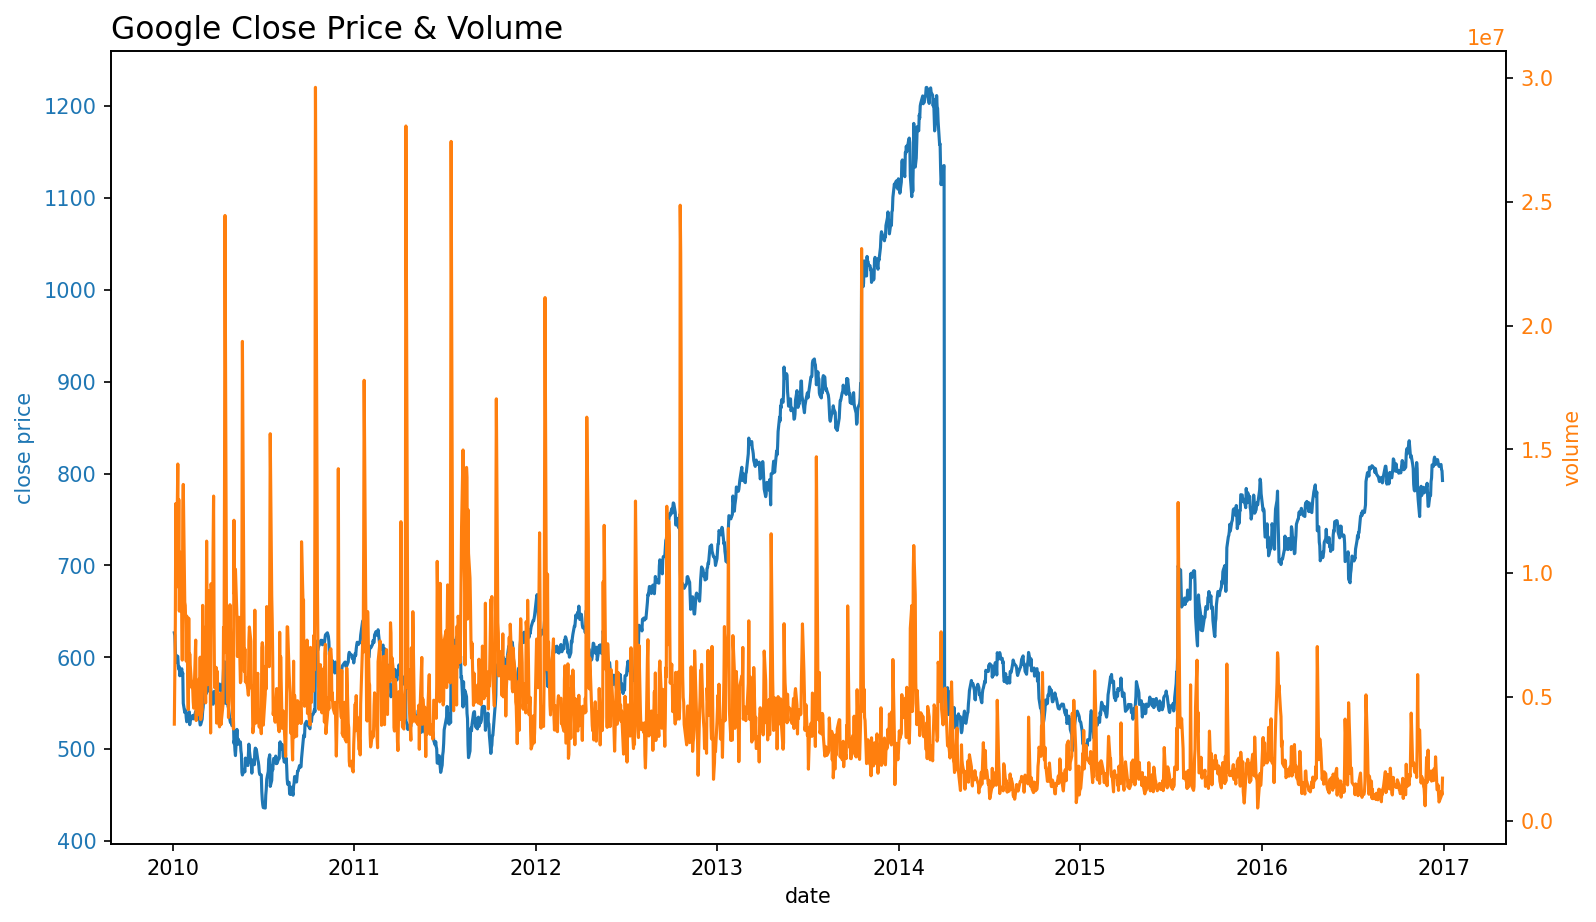

In [12]:

fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.plot(google['date'], google['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('volume', color=color)  
ax2.plot(google['date'], google['volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

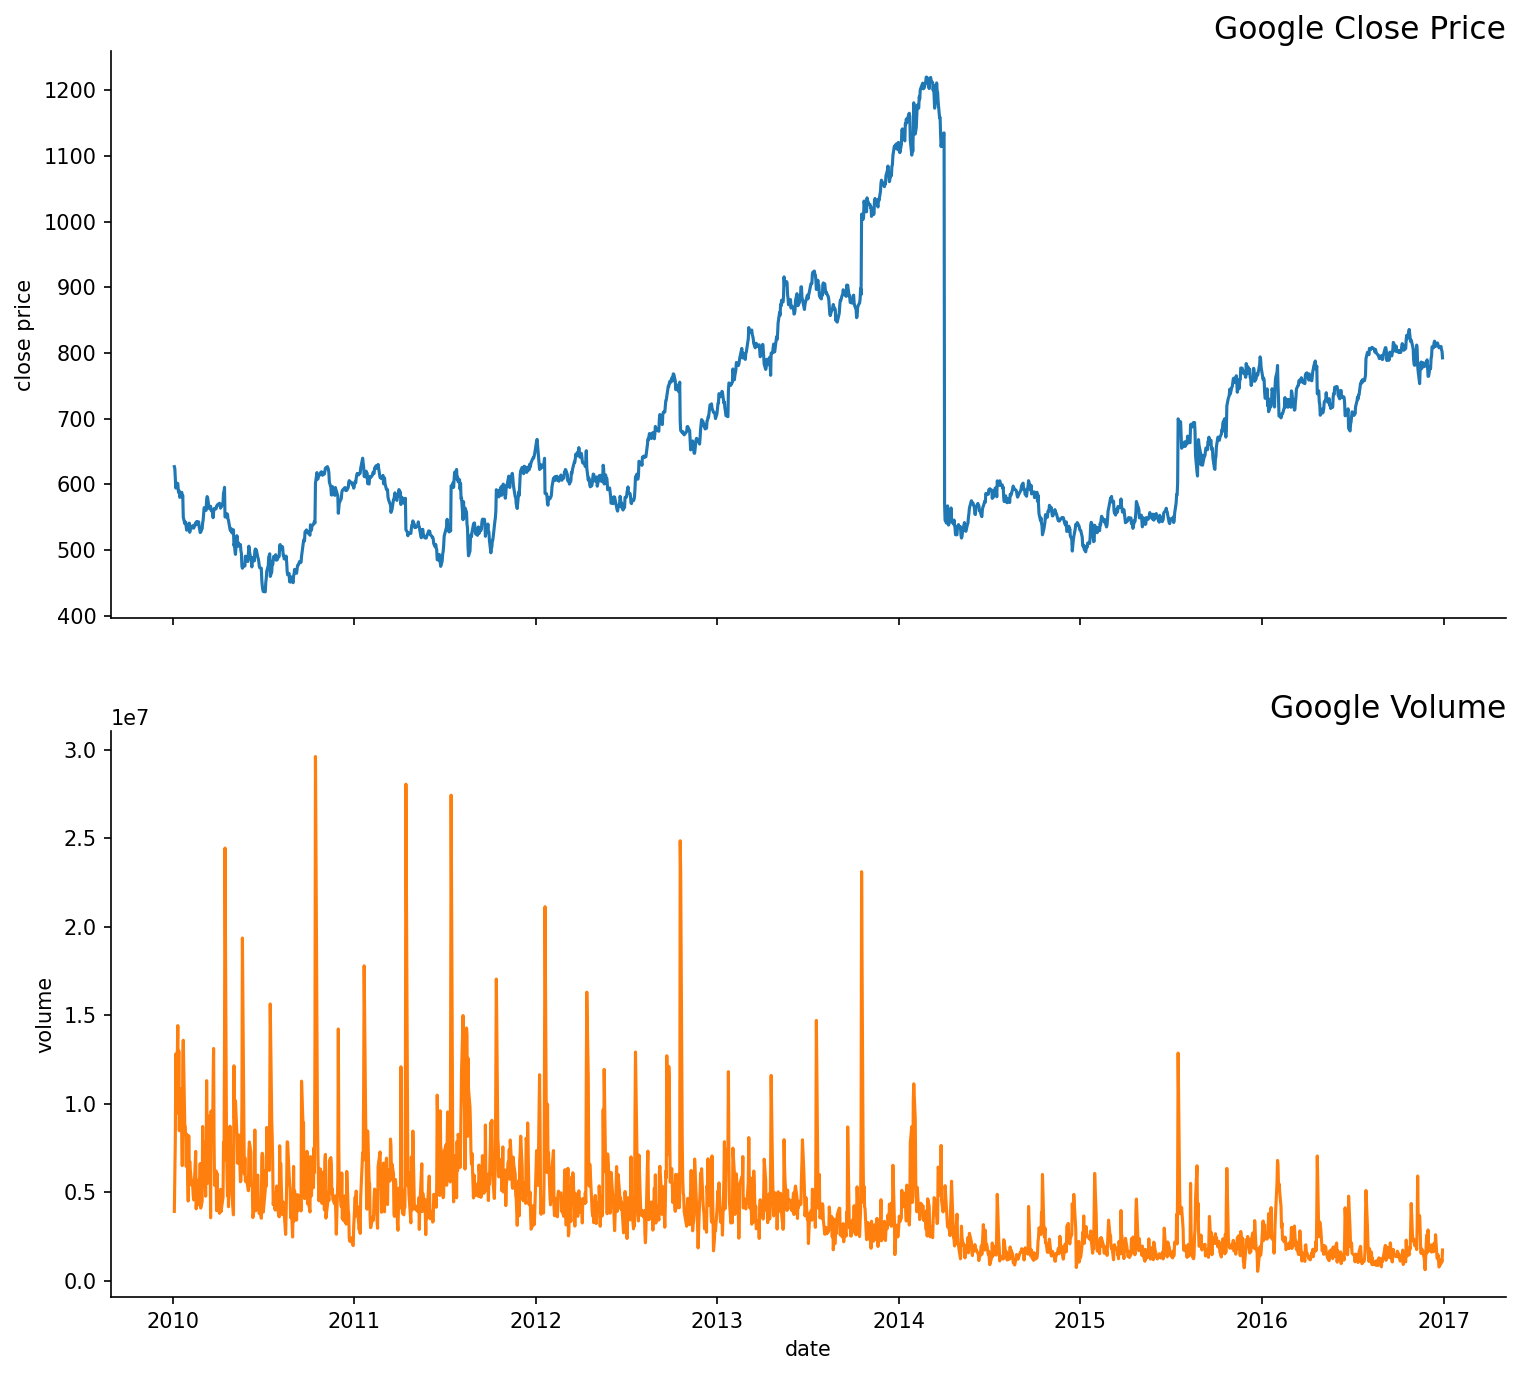

In [13]:

fig, ax = plt.subplots(2, 1, figsize=(12, 11), dpi=150, sharex=True)

color = 'tab:blue'

ax[0].set_ylabel('close price')  
ax[0].plot(google['date'], google['close'], color=color)

color = 'tab:orange'
ax[1].set_xlabel('date')
ax[1].set_ylabel('volume')  
ax[1].plot(google['date'], google['volume'], color=color)


ax[0].set_title('Google Close Price', loc='right', fontsize=15)
ax[1].set_title('Google Volume', loc='right', fontsize=15)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


plt.show()